In [ ]:
import tensorflow as tf  
# import keras
# https://keras.io/api/applications/

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3  import InceptionV3  
from tensorflow.keras.preprocessing import image  
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img  
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential  
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model  
import numpy as np  
import matplotlib.pyplot as plt  # ploting graphs
from glob import glob  

# from tensorflow.keras.applications.vgg19  import VGG19

# /content/drive/MyDrive/Tomato/dataset/train

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE = [224, 224]  ## conerting image into 224,224

train_path = '/content/drive/MyDrive/Tomato/dataset/train'  
valid_path = '/content/drive/MyDrive/Tomato/dataset/valid'

In [ ]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)  ## [224,224,3]

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# don't train on the inception weights
for layer in inceptionv3.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Tomato/dataset/train/*')

In [ ]:
folders  ## /content/drive/MyDrive/Tomato/dataset/train/Tomato___Bacterial_spot  

['/content/drive/MyDrive/Tomato/dataset/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___healthy',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Tomato/dataset/train/Tomato___Bacterial_spot']

In [ ]:
x = Flatten()(inceptionv3.output)  ## changimg the array size to 1-d array

In [ ]:
len(folders)

10

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)  # sigmoid 0,1
## fully connected layer
# create a model object
model = Model(inputs=inceptionv3.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss = 'categorical_crossentropy',  ## output categorical
  optimizer = "adam",  ## recude our loss score ["adam,sgd,gd,msgd"]
  metrics = ['accuracy']  ## accuary
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, #  [0,1]
                                   shear_range = 0.2,  ## data arugmention
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,  ## key roles ## 64
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/dataset/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18355 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
18355/32

573.59375

In [ ]:
# fit the model


r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,   
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
574/574 [==============================] - 5691s 10s/step - loss: 2.9705 - accuracy: 0.6832 - val_loss: 1.9871 - val_accuracy: 0.7802
Epoch 2/10
574/574 [==============================] - 264s 459ms/step - loss: 2.2225 - accuracy: 0.7875 - val_loss: 2.0128 - val_accuracy: 0.8041
Epoch 3/10
574/574 [==============================] - 265s 462ms/step - loss: 2.0135 - accuracy: 0.8240 - val_loss: 1.9941 - val_accuracy: 0.8325
Epoch 4/10
574/574 [==============================] - 263s 457ms/step - loss: 2.0355 - accuracy: 0.8424 - val_loss: 2.3446 - val_accuracy: 0.8275
Epoch 5/10
574/574 [==============================] - 260s 453ms/step - loss: 1.9647 - accuracy: 0.8508 - val_loss: 2.3422 - val_accuracy: 0.8356
Epoch 6/10
574/574 [==============================] - 260s 453ms/step - loss: 1.7422 - accuracy: 0.8696 - val_loss: 2.3003 - val_accuracy: 0.8401
Epoch 7/10
574/574 [==============================] - 260s 453ms/step - loss: 1.9273 - accuracy: 0.8677 - val_loss: 2.8538 - 

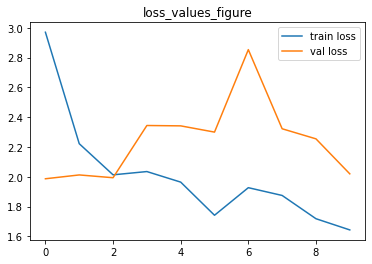

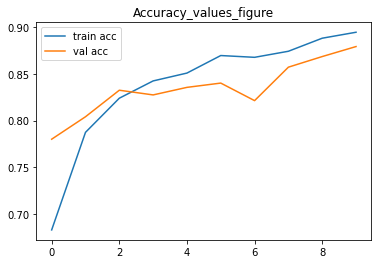

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title("loss_values_figure")
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title("Accuracy_values_figure")
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5') ## h5 

In [ ]:
# templates 
# colab notenobk
# model link ---> 
# https://keras.io/api/applications/
# https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
!nvidia-smi

Wed Jun  8 06:47:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   80C    P0    38W /  70W |   8938MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------